# Pandas - работа с таблицами

Часть 3

## Работа с данными

Загрузим датасет [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)

In [1]:
import pandas as pd

students = pd.read_csv("StudentsPerformance.csv")
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Узнаем, какие уникальные значения есть в каждой из колонок:

In [2]:
for column in students.columns:
    print(column, ":\n", *students[column].unique())

gender :
 female male
race/ethnicity :
 group B group C group A group D group E
parental level of education :
 bachelor's degree some college master's degree associate's degree high school some high school
lunch :
 standard free/reduced
test preparation course :
 none completed
math score :
 72 69 90 47 76 71 88 40 64 38 58 65 78 50 18 46 54 66 44 74 73 67 70 62 63 56 97 81 75 57 55 53 59 82 77 33 52 0 79 39 45 60 61 41 49 30 80 42 27 43 68 85 98 87 51 99 84 91 83 89 22 100 96 94 48 35 34 86 92 37 28 24 26 95 36 29 32 93 19 23 8
reading score :
 72 90 95 57 78 83 43 64 60 54 52 81 53 75 89 32 42 58 69 73 71 74 70 65 87 56 61 84 55 44 41 85 59 17 39 80 37 63 51 49 26 68 45 47 86 34 79 66 67 91 100 76 77 82 92 93 62 88 50 28 48 46 23 38 94 97 99 31 96 24 29 40
writing score :
 74 88 93 44 75 78 92 39 67 50 52 43 73 70 58 86 28 46 61 63 53 80 72 55 65 38 82 79 83 59 57 54 68 66 62 76 48 42 87 49 10 34 71 37 56 41 22 81 45 36 89 47 90 100 64 98 51 40 84 69 33 60 85 91 77 27 94 95 19 35 32 

Можно сделать это также с помощью метода `apply` (применить функцию к каждой колонке):

In [3]:
def func_uniq(column):
    return column.unique()


uniq_values=students.apply(func_uniq)
uniq_values

gender                                                            [female, male]
race/ethnicity                     [group B, group C, group A, group D, group E]
parental level of education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test preparation course                                        [none, completed]
math score                     [72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 6...
reading score                  [72, 90, 95, 57, 78, 83, 43, 64, 60, 54, 52, 8...
writing score                  [74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 4...
dtype: object

В метод apply можно передавать любую функцию, в том числе [статистические функции](https://numpy.org/doc/stable/reference/routines.statistics.html) из Numpy: `mean`, `median`, `std` и другие.

Различаются ли результаты студентов, которые оплачивают школьный обед полностью, и тех, кто имеет льготы?

In [3]:
standard = students[students["lunch"]=='standard'] # обычные
subsidized = students[students["lunch"]!='standard'] # льготники

С помощью `matplotlib.pyplot` можно построить графики на основе датафреймов:

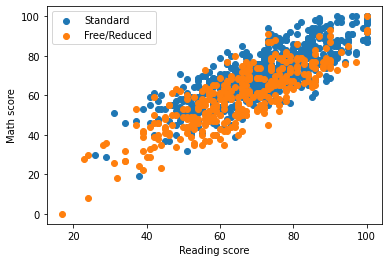

In [25]:
import matplotlib.pyplot as plt


for df in (standard, subsidized):
    plt.scatter(df["reading score"], df["math score"])
lunch_types = ["Standard", "Free/Reduced"] # Запомним эту пару строк
# в отдельную переменную, чтобы не прописывать её каждый раз
plt.legend(lunch_types)
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.show()

Кажется, что облако точек "Free/Reduced" смещено влево (и вниз) по отношению к облаку точек "Standard". Проверим это с помощью построения ящиков с усами:

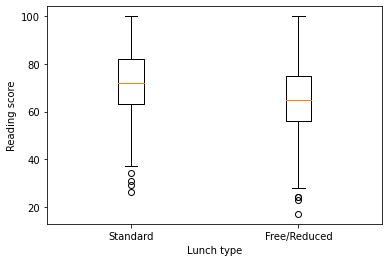

In [9]:
plt.boxplot((standard["reading score"], subsidized["reading score"]),
            labels=lunch_types)
plt.xlabel('Lunch type')
plt.ylabel('Reading score')
plt.show()

Теперь мы видим это более явно.

## Упражнение 1

Для каждого уровня образования родителей (parental level of education) постройте как subplot'ы:
- точечный график результатов экзамена по чтения и экзамена по математике
- точечный график результатов экзамена по чтения и экзамена по письму


## Упражнение 2

Для каждого уровня образования родителей и для каждого экзамена (чтение, письмо, математика) постройте ящики с усами.


## Упражнение 3

Вам дан датасет miceprotein.csv

[Miceprotein.csv на Kaggle](https://www.kaggle.com/datasets/muhammetvarl/mice-protein)

<hr>Уровни экспрессии 77 белков измерены в коре головного мозга 8 классов контрольных мышей и мышей с синдромом Дауна, подвергнутых контекстному обусловливанию страха - задаче, используемой для оценки ассоциативного обучения.

Набор данных состоит из уровней экспрессии 77 белков/белковых модификаций, которые давали детектируемые сигналы в ядерной фракции коры головного мозга. Имеется 38 контрольных мышей и 34 трисомные мыши (синдром Дауна), всего 72 мыши. В экспериментах было зарегистрировано 15 измерений каждого белка на образец/мышь. Таким образом, для контрольных мышей имеется 38x15, или 570 измерений, а для трисомных мышей - 34x15, или 510 измерений. Всего набор данных содержит 1080 измерений для каждого белка. Каждое измерение можно рассматривать как независимый образец/мышь.

Восемь классов мышей описаны на основе таких характеристик, как генотип, поведение и лечение. Согласно генотипу, мыши могут быть контрольными или трисомными. Согласно поведению, одни мыши были стимулированы к обучению (контекст-шок), а другие нет (шок-контекст), и для того, чтобы оценить эффект препарата мемантин в восстановлении способности к обучению у трисомных мышей, некоторым мышам вводили препарат, а другим нет.
</hr>
<hr></hr>

Для датасета miceprotein.csv постройте ящики с усами для уровней экспрессии белков `DYRK1A_N`, `SOD1_N` для каждого класса образцов. ⚠Некоторые данные отсутствуют. Для выбрасывания NaN-значений используйте метод `dropna`.


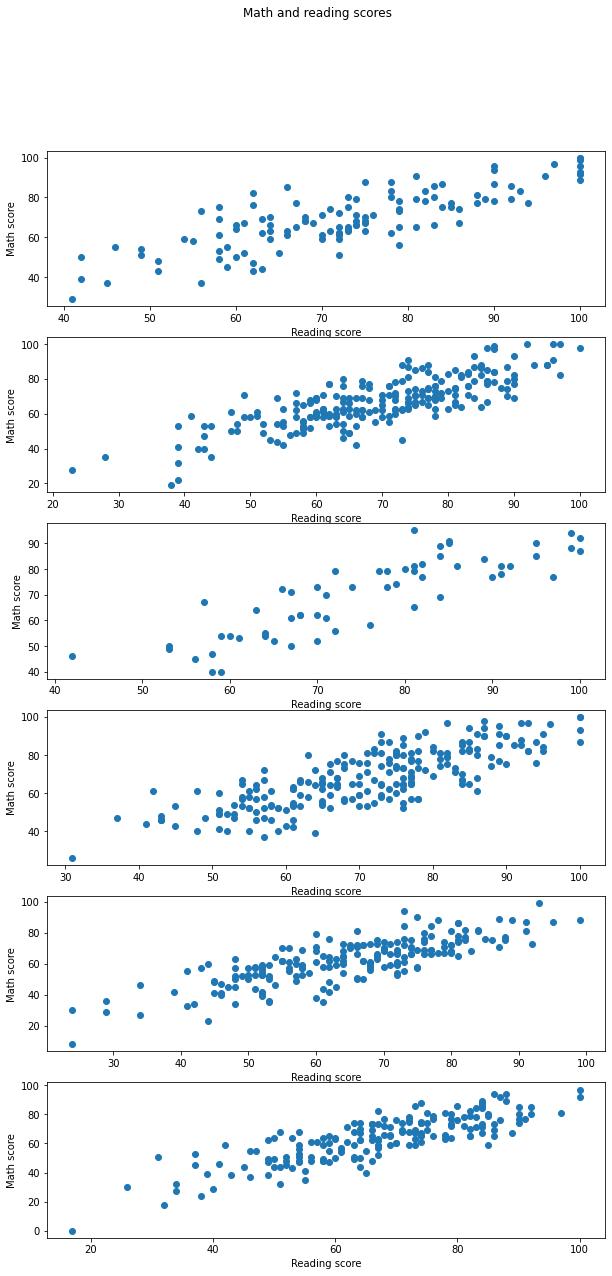

In [35]:
## Упражнение 1
import matplotlib.pyplot as plt
import pandas as pd



students = pd.read_csv("StudentsPerformance.csv")
bachelor = students[students["parental level of education"]=='bachelor\'s degree'] 
college = students[students["parental level of education"]=='some college']
master = students[students["parental level of education"]=='master\'s degree']
associate = students[students["parental level of education"]=='associate\'s degree']
school = students[students["parental level of education"]=='high school']
school_unc = students[students["parental level of education"]=='some high school']

levels_of_edu = [bachelor, college, master, associate, school, school_unc]

fig, axs = plt.subplots(6, figsize=(10, 20))
fig.suptitle('Math and reading scores')

for i in range(len(levels_of_edu)):
    axs[i].set_xlabel('Reading score')
    axs[i].set_ylabel('Math score')
    axs[i].scatter(levels_of_edu[i]["reading score"], levels_of_edu[i]["math score"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1fb82fdeb80>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb82fb9160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb82fde8b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1fb82fb9700>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fb82fb99d0>,
 'means': []}

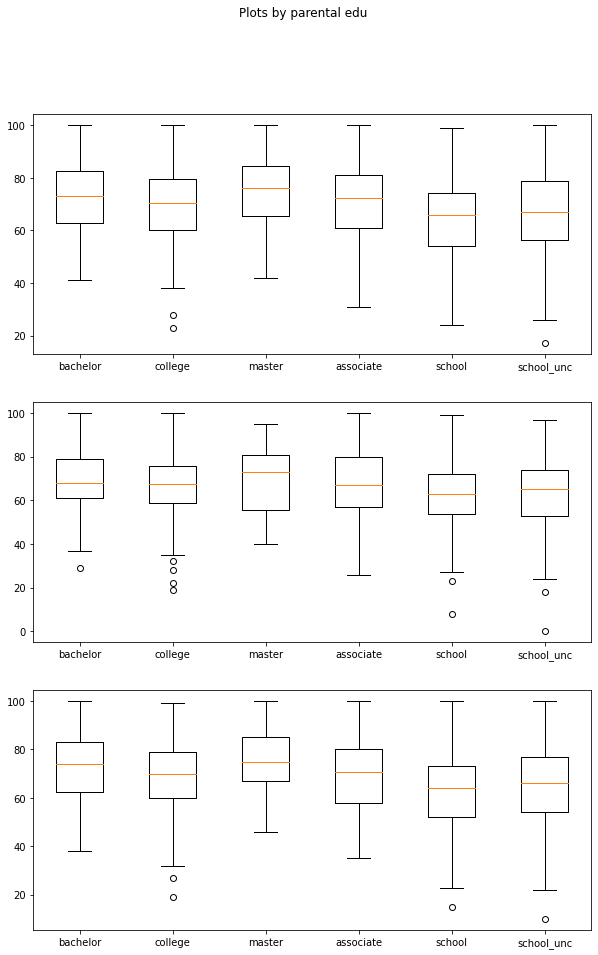

In [25]:
import matplotlib.pyplot as plt
import pandas as pd



students = pd.read_csv("StudentsPerformance.csv")
bachelor = students[students["parental level of education"]=='bachelor\'s degree'] 
college = students[students["parental level of education"]=='some college']
master = students[students["parental level of education"]=='master\'s degree']
associate = students[students["parental level of education"]=='associate\'s degree']
school = students[students["parental level of education"]=='high school']
school_unc = students[students["parental level of education"]=='some high school']

levels_of_edu = ['bachelor', 'college', 'master', 'associate', 'school', 'school_unc']

fig, axs = plt.subplots(3, figsize=(10, 15))
fig.suptitle('Plots by parental edu')


axs[0].boxplot((bachelor["reading score"], college["reading score"], master["reading score"],
                associate["reading score"], school["reading score"],  school_unc["reading score"]), labels=levels_of_edu)
axs[1].boxplot((bachelor["math score"], college["math score"], master["math score"],
                associate["math score"], school["math score"],  school_unc["math score"]), labels=levels_of_edu)
axs[2].boxplot((bachelor['writing score'], college['writing score'], master['writing score'],
                associate['writing score'], school['writing score'],  school_unc['writing score']), labels=levels_of_edu)

class :
 ["'c-CS-m'" "'c-SC-m'" "'c-CS-s'" "'c-SC-s'" "'t-CS-m'" "'t-SC-m'"
 "'t-CS-s'" "'t-SC-s'"]


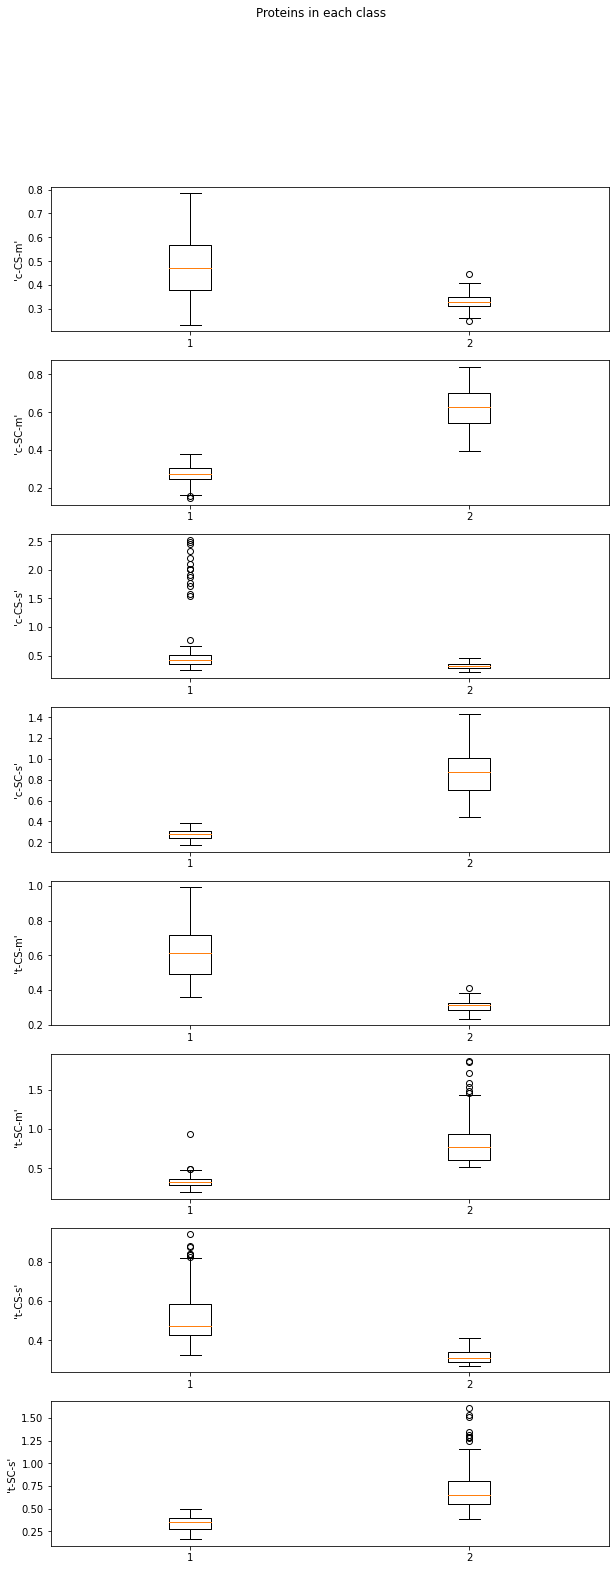

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

mice = pd.read_csv("miceprotein.csv")
mice = mice[(mice.DYRK1A_N != '?') & (mice.SOD1_N != '?')]
print('class', ":\n", mice['class'].unique())


one = mice[mice["class"]=='\'c-CS-m\''] 
two = mice[mice["class"]=='\'c-SC-m\''] 
three = mice[mice["class"]=='\'c-CS-s\''] 
four = mice[mice["class"]=='\'c-SC-s\''] 
five = mice[mice["class"]=='\'t-CS-m\''] 
six = mice[mice["class"]=='\'t-SC-m\''] 
seven = mice[mice["class"]=='\'t-CS-s\''] 
eight = mice[mice["class"]=='\'t-SC-s\''] 

fig, axs = plt.subplots(8, figsize=(10, 25))
fig.suptitle('Proteins in each class')
classes = [one, two, three, four, five, six, seven, eight]

for i in range(len(mice['class'].unique())):
    axs[i].set_ylabel(mice['class'].unique()[i])
    axs[i].boxplot((pd.to_numeric(classes[i]['DYRK1A_N']), pd.to_numeric(classes[i]['SOD1_N'])))

